In [44]:
import scanpy as sc
from anndata import AnnData

In [17]:
# Installing clustering packages
!conda install -y -c anaconda cmake 
!pip install leidenalg
!pip install louvain

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::jupyterlab_server==2.8.2=pyhd3eb1b0_0
  - defaults/osx-64::jupyter==1.0.0=py39hecd8cb5_7
  - defaults/noarch::python-lsp-black==1.0.0=pyhd3eb1b0_0
  - defaults/osx-64::nbconvert==6.1.0=py39hecd8cb5_0
  - defaults/osx-64::ipykernel==6.4.1=py39hecd8cb5_1
  - defaults/noarch::nbclassic==0.2.6=pyhd3eb1b0_0
  - defaults/osx-64::notebook==6.4.5=py39hecd8cb5_0
  - defaults/noarch::sphinx==4.2.0=pyhd3eb1b0_1
  - defaults/noarch::numpydoc==1.1.0=pyhd3eb1b0_1
  - defaults/osx-64::spyder-kernels==2.1.3=py39hecd8cb5_0
  - defaults/noarch::jupyterlab_pygments==0.1.2=py_0
  - defaults/osx-64::anaconda==2021.11=py39_0
  - defaults/noarch::jupyter_console==6.4.0=pyhd3eb1b0_0
  - defaults/osx-64::_ipyw_jlab_nb_ext_conf==0.1.0=py39hecd8cb5_0
  - defaults/noarch::black==19.10b0=py_0
  - defaults/noarch::qtconsole==5.1.1=pyhd3eb1b0_0
 

In [ ]:
# Importing clustering packages
import pandas as pd
import numpy as np

In [108]:
# Loading in the datasets
pan = sc.read_h5ad('Panh5.h5ad')
fernandes = sc.read_h5ad('fernandesh5.h5ad')
alsaigh = sc.read_h5ad('alsaighh5.h5ad')


In [109]:
pan 

AnnData object with n_obs × n_vars = 8770 × 345
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'mitoPercent', 'leiden'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [110]:
alsaigh

AnnData object with n_obs × n_vars = 44527 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'mitoPercent'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [69]:
fernandes

AnnData object with n_obs × n_vars = 5067 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'mitoPercent'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

/Users/judepops/opt/anaconda3/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


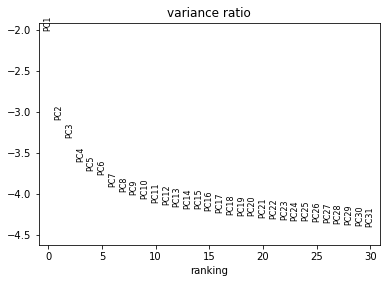

In [70]:
## Starting with Pan louvain clustering
sc.pp.highly_variable_genes(pan, min_mean=0.0125, max_mean=3, min_disp=0.5) #these are default values
pan.raw = pan #save raw data before processing values and further filtering
pan = pan[:, pan.var.highly_variable] #filter highly variable
sc.pp.scale(pan, max_value=10) #scale each gene to unit variance
sc.tl.pca(pan, svd_solver='arpack')
sc.pl.pca_variance_ratio(pan, log=True)

In [71]:
sc.pp.neighbors(pan, n_neighbors=10, n_pcs=20)


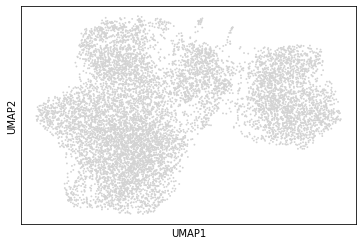

In [72]:
sc.tl.umap(pan)
sc.pl.umap(pan)

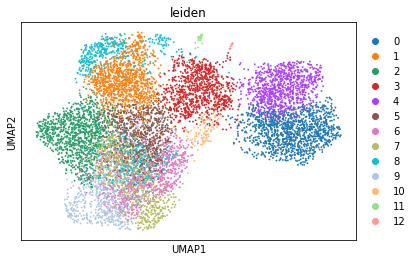

In [73]:
sc.tl.leiden(pan, resolution = 1)
sc.pl.umap(pan, color=['leiden'])

In [74]:
# Saving the pan dataframe with leiden clustering
AnnData.write_h5ad(pan, filename='Pan_louvain.h5ad')

In [50]:
#test = sc.read_h5ad('Pan_louvain.h5ad')


In [51]:
#test

AnnData object with n_obs × n_vars = 8770 × 345
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'mitoPercent', 'leiden'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

/Users/judepops/opt/anaconda3/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Users/judepops/opt/anaconda3/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  view_to_actual(adata)


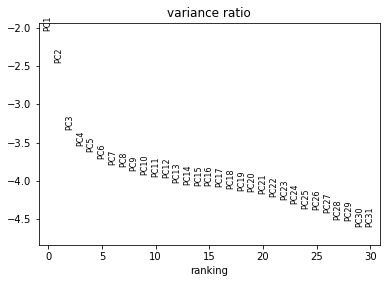

In [91]:
# alsaigh
alsaigh = sc.read_h5ad('alsaighh5.h5ad')

## Starting with alsaigh louvain clustering
sc.pp.highly_variable_genes(alsaigh, min_mean=0.0125, max_mean=3, min_disp=0.5) #these are default values
alsaigh.raw = alsaigh #save raw data before processing values and further filtering
alsaigh = alsaigh[:, alsaigh.var.highly_variable] #filter highly variable
sc.pp.scale(alsaigh, max_value=10) #scale each gene to unit variance
sc.tl.pca(alsaigh, svd_solver='arpack')
sc.pl.pca_variance_ratio(alsaigh, log=True)
sc.pp.neighbors(alsaigh, n_neighbors=10, n_pcs=20)


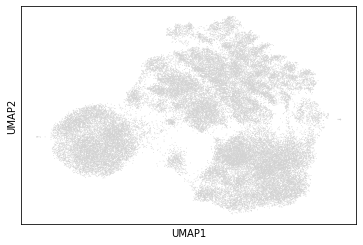

In [92]:
sc.tl.umap(alsaigh)
sc.pl.umap(alsaigh)

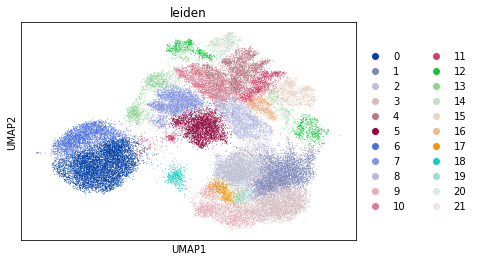

In [93]:
sc.tl.leiden(alsaigh, resolution = 1)
sc.pl.umap(alsaigh, color=['leiden'])

In [94]:
AnnData.write_h5ad(alsaigh, filename='alsaigh_louvain.h5ad')

In [95]:
alsaigh

AnnData object with n_obs × n_vars = 44527 × 326
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'mitoPercent', 'leiden'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [126]:
fernandes = sc.read_h5ad('fernandesh5.h5ad')


In [127]:
fernandes.obs

,orig.ident,nCount_RNA,nFeature_RNA,mitoPercent
Sample1_AACTCAGCATCAGTCA-1,SeuratProject,1133.0,599,0.000000
Sample1_AACTTTCGTAGCGTCC-1,SeuratProject,2508.0,1140,4.505582
Sample1_AAGACCTAGTTAGCGG-1,SeuratProject,4383.0,1448,5.886379
Sample1_AAGCCGCTCGTTACAG-1,SeuratProject,4540.0,1503,1.607930
Sample1_AAGCCGCTCTGTCAAG-1,SeuratProject,2720.0,1104,1.654412
...,...,...,...,...
Sample5 _TTTCCTCTCTGCTGCT-1,SeuratProject,1244.0,684,1.205788
Sample5 _TTTGCGCCACAGGCCT-1,SeuratProject,2487.0,754,1.728991
Sample5 _TTTGGTTAGACGACGT-1,SeuratProject,1543.0,685,1.360985
Sample5 _TTTGTCAGTGGTTTCA-1,SeuratProject,3912.0,1288,2.888548


/Users/judepops/opt/anaconda3/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Users/judepops/opt/anaconda3/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  view_to_actual(adata)


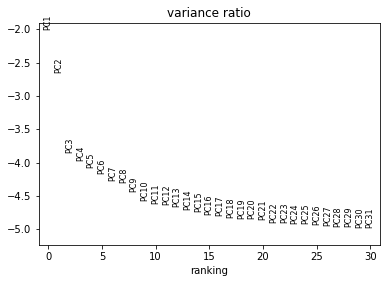

In [128]:
#Same for fernandes 

## Starting with fernandes louvain clustering
sc.pp.highly_variable_genes(fernandes, min_mean=0.0125, max_mean=3, min_disp=0.5) #these are default values
fernandes.raw = fernandes #save raw data before processing values and further filtering
fernandes = fernandes[:, fernandes.var.highly_variable] #filter highly variable
sc.pp.scale(fernandes, max_value=10) #scale each gene to unit variance
sc.tl.pca(fernandes, svd_solver='arpack')
sc.pl.pca_variance_ratio(fernandes, log=True)
sc.pp.neighbors(fernandes, n_neighbors=10, n_pcs=20)


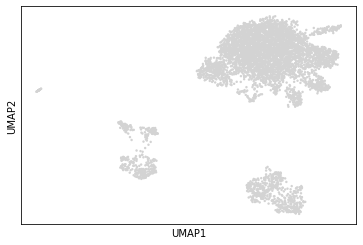

In [129]:
sc.tl.umap(fernandes)
sc.pl.umap(fernandes)

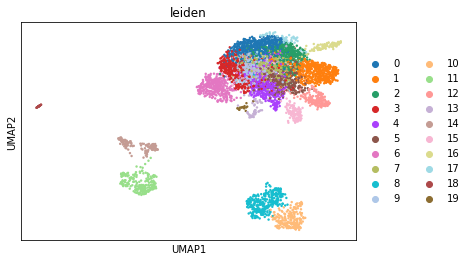

In [130]:
sc.tl.leiden(fernandes, resolution = 1)
sc.pl.umap(fernandes, color=['leiden'])

In [131]:
AnnData.write_h5ad(fernandes, filename='fernandes_louvain.h5ad')

In [122]:
fernandes.obs

,orig.ident,nCount_RNA,nFeature_RNA,mitoPercent,leiden
clusters_AACTCAGCATCAGTCA-1,SeuratProject,1133.0,599,0.000000,13
clusters_AACTTTCGTAGCGTCC-1,SeuratProject,2508.0,1140,4.505582,12
clusters_AAGACCTAGTTAGCGG-1,SeuratProject,4383.0,1448,5.886379,12
clusters_AAGCCGCTCGTTACAG-1,SeuratProject,4540.0,1503,1.607930,12
clusters_AAGCCGCTCTGTCAAG-1,SeuratProject,2720.0,1104,1.654412,12
...,...,...,...,...,...
merged_alsaigh_filtered_h5_TTTCCTCTCTGCTGCT-1,SeuratProject,1244.0,684,1.205788,0
merged_alsaigh_filtered_h5_TTTGCGCCACAGGCCT-1,SeuratProject,2487.0,754,1.728991,0
merged_alsaigh_filtered_h5_TTTGGTTAGACGACGT-1,SeuratProject,1543.0,685,1.360985,0
merged_alsaigh_filtered_h5_TTTGTCAGTGGTTTCA-1,SeuratProject,3912.0,1288,2.888548,7


In [121]:
fernandes.obs

,orig.ident,nCount_RNA,nFeature_RNA,mitoPercent,leiden
clusters_AACTCAGCATCAGTCA-1,SeuratProject,1133.0,599,0.000000,13
clusters_AACTTTCGTAGCGTCC-1,SeuratProject,2508.0,1140,4.505582,12
clusters_AAGACCTAGTTAGCGG-1,SeuratProject,4383.0,1448,5.886379,12
clusters_AAGCCGCTCGTTACAG-1,SeuratProject,4540.0,1503,1.607930,12
clusters_AAGCCGCTCTGTCAAG-1,SeuratProject,2720.0,1104,1.654412,12
...,...,...,...,...,...
merged_alsaigh_filtered_h5_TTTCCTCTCTGCTGCT-1,SeuratProject,1244.0,684,1.205788,0
merged_alsaigh_filtered_h5_TTTGCGCCACAGGCCT-1,SeuratProject,2487.0,754,1.728991,0
merged_alsaigh_filtered_h5_TTTGGTTAGACGACGT-1,SeuratProject,1543.0,685,1.360985,0
merged_alsaigh_filtered_h5_TTTGTCAGTGGTTTCA-1,SeuratProject,3912.0,1288,2.888548,7


In [96]:
alsaigh.obs

,orig.ident,nCount_RNA,nFeature_RNA,mitoPercent,leiden
AAACGAAAGATCCCAT-1,0,7783.0,2325,3.880252,2
AAACGAACAGGCTACC-1,0,4723.0,1645,3.175947,1
AAACGAAGTACAAGCG-1,0,3061.0,1401,8.428618,2
AAACGAATCCTGCTAC-1,0,4845.0,1829,2.930857,3
AAACGAATCTCTAAGG-1,0,1169.0,609,5.303678,2
...,...,...,...,...,...
TTTGTTGTCAAAGACA-6,0,4606.0,1448,4.103343,5
TTTGTTGTCATCACCC-6,0,829.0,537,5.669481,12
TTTGTTGTCATTTGCT-6,0,15975.0,3659,4.006260,0
TTTGTTGTCCACTAGA-6,0,3335.0,1096,3.238381,12


In [102]:
# Extracting cell names and leiden clusters 
alsaigh.obs.to_csv('alsaigh.csv')


In [103]:
pan.obs.to_csv('pan.csv')


In [132]:
fernandes.obs.to_csv('fernandes.csv')


In [ ]:
# Clustering the harmony integrated dataset aswell


In [106]:
harmony = sc.read_h5ad('Carotid_Harmonised.h5ad')


/Users/judepops/opt/anaconda3/lib/python3.9/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [107]:
harmony

AnnData object with n_obs × n_vars = 46626 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'mitoPercent', 'RNA_snn_res.0.8', 'seurat_clusters', 'Source', 'mito.percent', 'RNA_snn_res.0.5'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'neighbors'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'HARMONY', 'PCs'
    obsp: 'distances'

/Users/judepops/opt/anaconda3/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Users/judepops/opt/anaconda3/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:843: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  view_to_actual(adata)


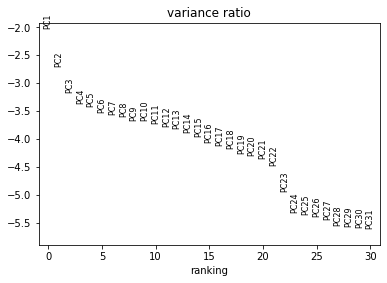

In [112]:
## Starting with alsaigh louvain clustering
sc.pp.highly_variable_genes(harmony, min_mean=0.0125, max_mean=3, min_disp=0.5) #these are default values
harmony.raw = harmony #save raw data before processing values and further filtering
harmony = harmony[:, harmony.var.highly_variable] #filter highly variable
sc.pp.scale(harmony, max_value=10) #scale each gene to unit variance
sc.tl.pca(harmony, svd_solver='arpack')
sc.pl.pca_variance_ratio(harmony, log=True)
sc.pp.neighbors(harmony, n_neighbors=10, n_pcs=20)

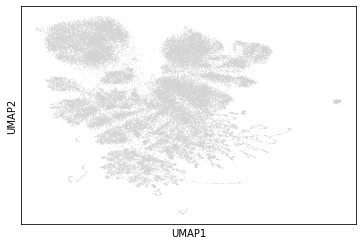

In [113]:
sc.tl.umap(harmony)
sc.pl.umap(harmony)

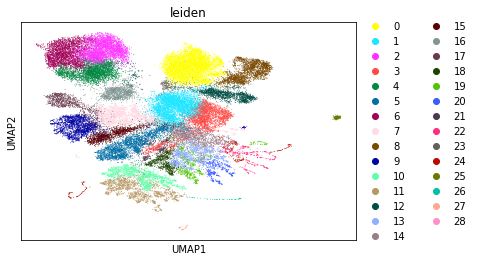

In [114]:
sc.tl.leiden(harmony, resolution = 1)
sc.pl.umap(harmony, color=['leiden'])

In [115]:
harmony.obs.to_csv('harmony.csv')


AnnData object with n_obs × n_vars = 46626 × 310
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'mitoPercent', 'RNA_snn_res.0.8', 'seurat_clusters', 'Source', 'mito.percent', 'RNA_snn_res.0.5', 'leiden'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'neighbors', 'hvg', 'pca', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'HARMONY', 'PCs'
    obsp: 'distances', 'connectivities'